## Load Data & Split

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

df = pd.read_csv('../data/cardio_train_clean.csv')

X = df.drop(columns=['cardio']).values 
y = df['cardio'].values                 

# Split: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (51929, 13)
Testing data shape: (12983, 13)


## The Algorithm (The Math)
### Sigmoid Function: Maps predictions to a probability between 0 and 1.
### Cost Function: Calculates how "wrong" the model is.
### Gradient Descent: Adjusts the weights to minimize the error.
<img src='https://encrypted-tbn2.gstatic.com/licensed-image?q=tbn:ANd9GcST_4NT4N6Fv5Sm2CFukUZ7QzB5j-rdU3kjd-Dl5yPCZvrcnILr2HNZYi4xrgqg3PT-Q-c_k5IPJ2QxkfI4lPGD80SnsJcKkZcSzD-Rhbc2otVyfBk' width="300" height="300"/></a>

### The weight represents how many marks you gain for every 1 hour of study.
If Weight = 5, it means for every hour you study, your score goes up by 5 points.<br>
If Weight = 0.5, studying doesn't help much (maybe the exam is very hard).<br>
If Weight is negative, studying actually hurts your score (maybe you get tired!).

### The bias represents the score a student would get if they studied 0 hours.Even without studying, maybe you get 20 marks just for writing your name and guessing.
So, Bias = 20.

In [107]:
# Logistic Regression Class (From Scratch)
class LogisticRegressionFromScratch:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    # 1. Sigmoid Activation Function
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    # 2. Training (Gradient Descent)
    def fit(self, X, y):
        num_samples, num_features = X.shape
        
        # Initialize weights and bias to zeros
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient Descent Loop
        for i in range(self.num_iterations):
            # Linear model: z = wX + b
            linear_model = np.dot(X, self.weights) + self.bias
            
            # Apply Sigmoid to get probability (0 to 1)
            y_predicted = self._sigmoid(linear_model)

            # Compute Gradients (derivatives)
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            # Update Parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Print cost every 100 iterations (Optional visualization)
            if i % 100 == 0:
                print(f"Iteration {i}: Optimization in progress...")

    # 3. Prediction
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

print("Custom Logistic Regression Class defined successfully!")

Custom Logistic Regression Class defined successfully!


## Training & Evaluation

In [109]:
model = LogisticRegressionFromScratch(learning_rate=0.1, num_iterations=10000)

# Train it (This might take a few seconds)
print("Starting training...")
model.fit(X_train, y_train)
print("Training completed.")

# Test the model
predictions = model.predict(X_test)

# Calculate Accuracy manually
accuracy = np.sum(predictions == y_test) / len(y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Starting training...
Iteration 0: Optimization in progress...
Iteration 100: Optimization in progress...
Iteration 200: Optimization in progress...
Iteration 300: Optimization in progress...
Iteration 400: Optimization in progress...
Iteration 500: Optimization in progress...
Iteration 600: Optimization in progress...
Iteration 700: Optimization in progress...
Iteration 800: Optimization in progress...
Iteration 900: Optimization in progress...
Iteration 1000: Optimization in progress...
Iteration 1100: Optimization in progress...
Iteration 1200: Optimization in progress...
Iteration 1300: Optimization in progress...
Iteration 1400: Optimization in progress...
Iteration 1500: Optimization in progress...
Iteration 1600: Optimization in progress...
Iteration 1700: Optimization in progress...
Iteration 1800: Optimization in progress...
Iteration 1900: Optimization in progress...
Iteration 2000: Optimization in progress...
Iteration 2100: Optimization in progress...
Iteration 2200: Optimiz

## Metric Visualization

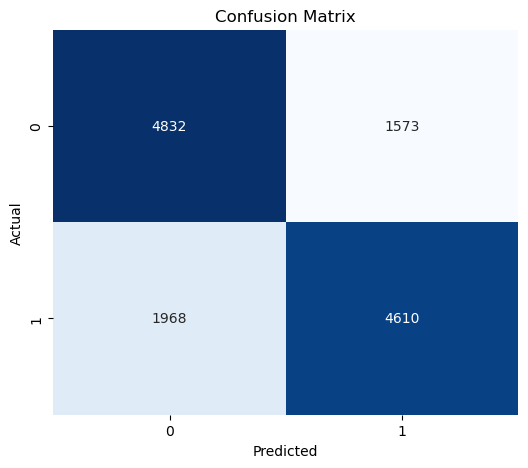

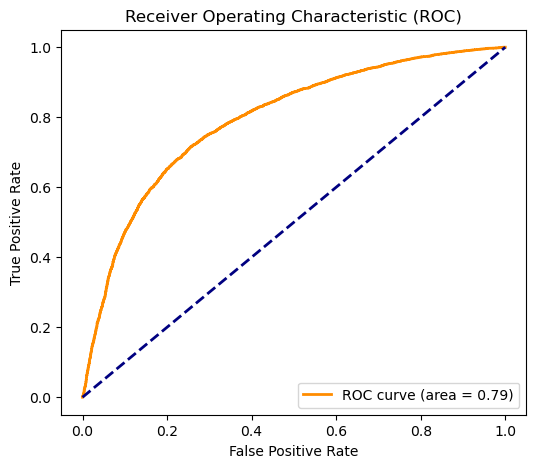

In [111]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

# 1. Confusion Matrix
# Compare actual (y_test) vs predicted (predictions)
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 2. ROC Curve
# We need probability scores, not just 0/1. 
# Our custom class has a helper for this (hidden inside predict), 
# but let's recalculate the probabilities manually for the graph:
z = np.dot(X_test, model.weights) + model.bias
y_prob = model._sigmoid(z)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [112]:
import pickle
import os

save_path = '../backend/model.pkl'

if not os.path.exists('../backend'):
    print("Error: 'app' folder not found. Please create a folder named 'app' first.")
else:
    with open(save_path, 'wb') as f:
        pickle.dump(model, f)
    
    print(f"Success! model.pkl was created at: {save_path}")

Success! model.pkl was created at: ../app/model.pkl


In [113]:
# Save the retrained model
with open('../backend/model.pkl', 'wb') as f:
    pickle.dump(model, f)
print("✅ Custom Model saved (trained on 13 features)!")

✅ Custom Model saved (trained on 13 features)!
